In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('C:/Users/Ольга/Downloads/stud_math.csv')

In [268]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


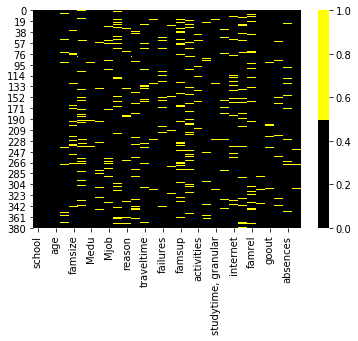

In [269]:
cols = stud_math.columns[:30] 

colours = ['black','yellow'] 
sns.heatmap(stud_math[cols].isnull(), cmap=sns.color_palette(colours))

for col in stud_math.columns:
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [270]:
for col in list(stud_math):
    x = stud_math[col].unique()
    print(col, x)

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' nan 'R']
famsize [nan 'GT3' 'LE3']
Pstatus ['A' nan 'T']
Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Mjob ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
schoolsup ['yes' 'no' nan]
famsup ['no' 'yes' nan]
paid ['no' nan 'yes']
activities ['no' 'yes' nan]
nursery ['yes' 'no' nan]
studytime, granular [ -6.  -9.  -3.  nan -12.]
higher ['yes' nan 'no']
internet [nan 'yes' 'no']
romantic ['no' nan 'yes']
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.

In [271]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1) # Удаляем этот столбец. Его нету в условиях задачи.

In [272]:
stud_math.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [273]:
#Я буду использовать этот метод к каждому столбцу, так как процент пропущенных значений очень мал
stud_math['health'] = stud_math['health'].fillna(stud_math['health'].median()) #Меняю пустые значения на медианные

In [274]:
mean = np.round(stud_math['goout'].mean())
stud_math['goout'] = stud_math['goout'].fillna(mean) 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


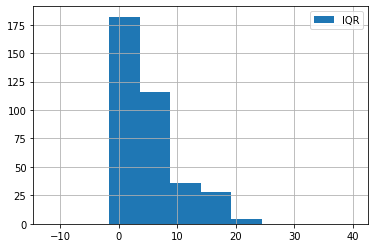

In [275]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (-12, 40), label = 'IQR')
 
plt.legend();
stud_math.loc[:, ['absences']].info()

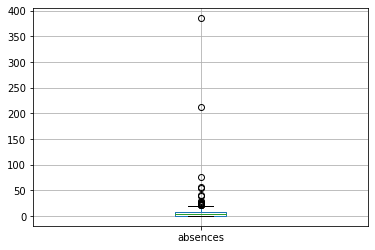

In [276]:
pd.DataFrame(stud_math['absences']).boxplot()

In [277]:
stud_math[stud_math['absences'] > 20] # Есть несколько больших выбросов (> 50) их нужно удалить

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


In [278]:
stud_math.drop(stud_math[stud_math.absences > 50].index, inplace=True) # Удаляю выбросы > 50

In [279]:
mean_1 = np.round(stud_math['absences'].mean())
stud_math['absences'] = stud_math['absences'].fillna(mean_1)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
score    384 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


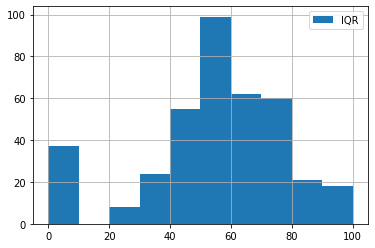

In [280]:
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), label = 'IQR')
 
plt.legend();
stud_math.loc[:, ['score']].info()

In [281]:
stud_math['score'] = stud_math['score'].fillna(stud_math['score'].median())

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
freetime    380 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


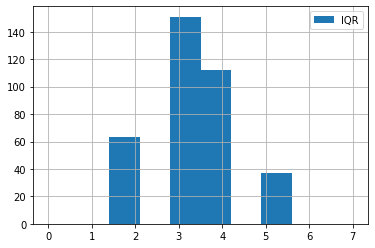

In [282]:
IQR = stud_math.freetime.quantile(0.75) - stud_math.freetime.quantile(0.25)
perc25 = stud_math.freetime.quantile(0.25)
perc75 = stud_math.freetime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.freetime.loc[stud_math.freetime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 7), label = 'IQR')
 
plt.legend();
stud_math.loc[:, ['freetime']].info()

In [283]:
display(stud_math[stud_math.freetime > 5.5],
       stud_math[stud_math.freetime < 1.5]) # Все выбросы = 1, так ка это есть в условиях задания, мы небудем считать это за выбросы

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,3.0,5.0,18.0,35.0
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
106,GP,F,15,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,no,5.0,1.0,2.0,3.0,8.0,40.0
111,GP,F,16,R,GT3,T,3.0,3.0,services,other,reputation,father,1.0,3.0,1.0,yes,yes,no,yes,yes,yes,yes,no,4.0,1.0,2.0,2.0,0.0,50.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,no,no,3.0,1.0,3.0,4.0,4.0,50.0


In [284]:
stud_math['freetime'] = stud_math['freetime'].fillna(stud_math['freetime'].max()) #Для баланса мы заполним пропуски максимальным значением

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
famrel    364 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


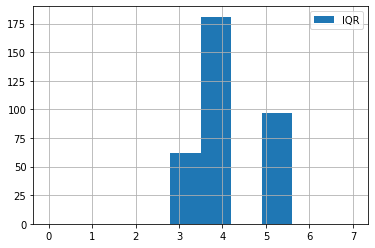

In [285]:
IQR = stud_math.famrel.quantile(0.75) - stud_math.famrel.quantile(0.25)
perc25 = stud_math.famrel.quantile(0.25)
perc75 = stud_math.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.famrel.loc[stud_math.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 7), label = 'IQR')
 
plt.legend();
stud_math.loc[:, ['famrel']].info()

In [286]:
display(stud_math[stud_math.famrel > 5],
       stud_math[stud_math.famrel < 2.5])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0


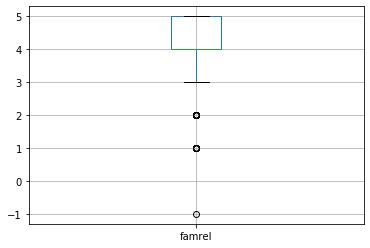

In [287]:
pd.DataFrame(stud_math['famrel']).boxplot() # 1 отрицательный выброс, его быть недолжно

In [288]:
stud_math.drop(stud_math[stud_math.famrel < 0].index, inplace=True)

In [289]:
stud_math['famrel'] = stud_math['famrel'].fillna(stud_math['famrel'].median())

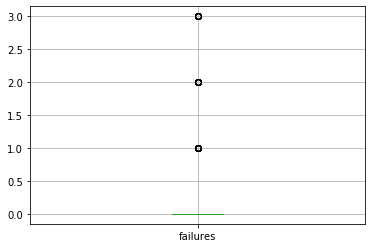

In [290]:
pd.DataFrame(stud_math['failures']).boxplot() #В условии задачи присутствует значения (1,2,3), не будем считать их выбросами

In [291]:
stud_math['failures'] = stud_math['failures'].fillna(stud_math['failures'].median())

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
studytime    382 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


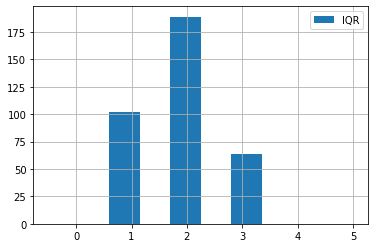

In [292]:
IQR = stud_math.studytime.quantile(0.75) - stud_math.studytime.quantile(0.25)
perc25 = stud_math.studytime.quantile(0.25)
perc75 = stud_math.studytime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.studytime.loc[stud_math.studytime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (-0.5, 5), label = 'IQR')
 
plt.legend();
stud_math.loc[:, ['studytime']].info()

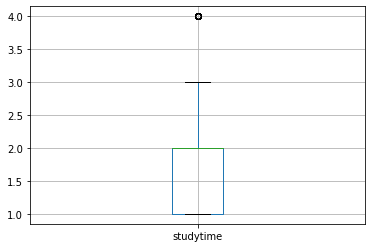

In [293]:
pd.DataFrame(stud_math['studytime']).boxplot() # 4 расположена близко к границе и присутствует в условиях, за выброс не считаем

In [294]:
stud_math['studytime'] = stud_math['studytime'].fillna(stud_math['studytime'].median())

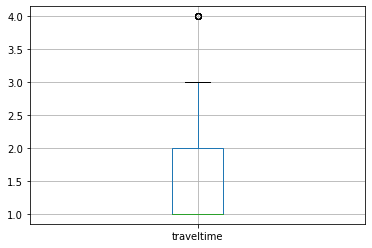

In [295]:
pd.DataFrame(stud_math['traveltime']).boxplot()

In [296]:
stud_math['traveltime'] = stud_math['traveltime'].fillna(stud_math['traveltime'].median())

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Fedu    365 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


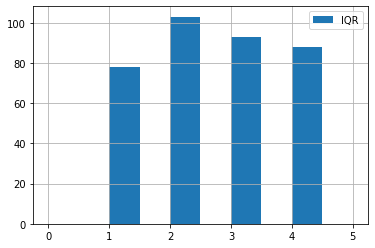

In [297]:
IQR = stud_math.Fedu.quantile(0.75) - stud_math.Fedu.quantile(0.25)
perc25 = stud_math.Fedu.quantile(0.25)
perc75 = stud_math.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.Fedu.loc[stud_math.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 5), label = 'IQR')
 
plt.legend();
stud_math.loc[:, ['Fedu']].info()

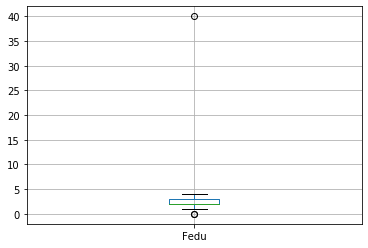

In [298]:
pd.DataFrame(stud_math['Fedu']).boxplot() #Ошибка в заполнение данных, меняем 40 на 4

In [299]:
stud_math['Fedu'] = stud_math.Fedu.apply(lambda x: 4 if x == 40 else x)

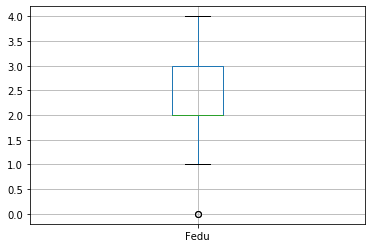

In [328]:
pd.DataFrame(stud_math['Fedu']).boxplot() #Ошибка в заполнение данных, меняем 40 на 4

In [300]:
stud_math['Fedu'] = stud_math['Fedu'].fillna(stud_math['Fedu'].median())

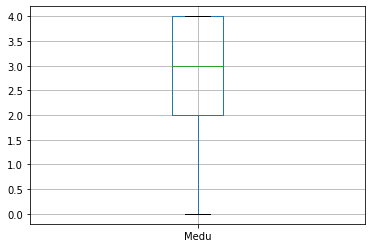

In [301]:
pd.DataFrame(stud_math['Medu']).boxplot()

In [302]:
stud_math['Medu'] = stud_math['Medu'].fillna(stud_math['Medu'].median())

In [303]:
stud_math.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,-0.024404,-0.185710,0.176969,0.058442,0.108310,-0.053015,-1.906005e-02,-1.157680e-02,0.090266,-0.126628,-0.033495,-0.043147,-0.002948,0.077104,0.069370,-0.067869,0.000548,-0.081036,0.051083,0.005950,0.077297,0.061784,0.054432,0.037379,-0.050268,-0.088369,-0.000719,-0.010629
sex,-0.024404,1.000000,0.035311,-0.011673,0.034856,0.010759,-0.087776,3.757508e-02,1.519580e-01,-0.011972,-0.072951,-0.025774,0.027940,0.157595,0.005426,0.083324,-0.047492,-0.100805,0.076475,-0.001857,0.015748,-0.097900,-0.137187,-0.000054,0.141188,0.062145,-0.026805,0.047306,0.045227
age,-0.185710,0.035311,1.000000,-0.154472,-0.029387,-0.047856,0.002929,2.794312e-02,5.111842e-02,0.012767,0.026551,0.208634,0.079157,0.033625,0.129984,-0.150588,-0.002939,-0.039799,0.011336,0.024438,-0.040904,0.033498,-0.040695,0.053809,0.067102,0.010894,-0.089862,-0.109997,0.014192
address,0.176969,-0.011673,-0.154472,1.000000,-0.069451,0.049585,0.080433,-9.055913e-02,-8.945685e-02,-0.072950,-0.002302,-0.119637,0.080897,0.104586,0.077688,0.027283,0.034722,-0.065014,0.077188,-0.002248,0.057620,0.141939,0.016654,-0.019972,-0.010920,0.047522,-0.059899,0.097222,0.103191
famsize,0.058442,0.034856,-0.029387,-0.069451,1.000000,-0.006691,-0.029750,1.659862e-02,9.139690e-02,0.025725,0.006934,0.023472,-0.064931,-0.009154,0.010730,0.004699,-0.033303,-0.069367,-0.082143,-0.042944,0.036113,-0.051534,-0.034304,0.050064,-0.021869,-0.034025,0.032220,0.029071,-0.029810
Pstatus,0.108310,0.010759,-0.047856,0.049585,-0.006691,1.000000,-0.027716,3.885851e-02,2.808983e-03,0.042131,-0.096434,-0.062954,-0.080465,-0.070374,0.064058,-0.023950,-0.006421,-0.063601,0.035959,-0.026803,0.042223,0.012131,0.074215,-0.069114,0.040386,0.007202,-0.043845,-0.047041,0.035039
Medu,-0.053015,-0.087776,0.002929,0.080433,-0.029750,-0.027716,1.000000,1.650096e-01,-2.179346e-01,0.081822,-0.042107,0.107959,0.015168,0.043282,0.093251,-0.059424,-0.064436,-0.042300,-0.095732,0.045106,0.060195,0.034110,-0.016258,-0.082167,-0.033735,0.051086,-0.001914,-0.032523,0.009008
Fedu,-0.019060,0.037575,0.027943,-0.090559,0.016599,0.038859,0.165010,1.000000e+00,7.666723e-17,0.120459,0.036065,0.042129,-0.067684,-0.000804,-0.004574,0.040978,-0.014991,0.028388,-0.011715,-0.010437,-0.110889,-0.061099,-0.047444,-0.063434,0.001022,0.035082,-0.026988,-0.008092,-0.075365
Mjob,-0.011577,0.151958,0.051118,-0.089457,0.091397,0.002809,-0.217935,7.666723e-17,1.000000e+00,0.044128,-0.012733,-0.023489,-0.021914,0.052822,-0.044019,0.046864,0.011184,0.028890,0.058874,-0.071956,-0.142183,-0.074014,-0.073179,-0.016988,0.070065,-0.004413,-0.011586,0.038485,0.002556
Fjob,0.090266,-0.011972,0.012767,-0.072950,0.025725,0.042131,0.081822,1.204587e-01,4.412805e-02,1.000000,-0.016886,0.067487,0.063888,0.064852,-0.021982,0.015399,0.039535,0.046947,0.023869,0.017357,0.043120,-0.098080,0.046892,0.029429,-0.055131,0.011183,0.022809,0.056829,-0.034551


In [304]:
stud_math = stud_math[stud_math['schoolsup'].notnull()] # Удаляем все строки с пропущенным значение, так как их 2% 

In [305]:
def fast_mode(stud_math, key_cols, value_col):
    return (stud_math.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')

In [306]:
stud_math.loc[stud_math.guardian.isnull(), 'guardian'] = stud_math.age.map(fast_mode(stud_math, ['age'], 
                                                                                      'guardian').set_index('age').guardian)

In [307]:
stud_math.loc[stud_math.address.isnull(), 'address'] = stud_math.school.map(fast_mode(stud_math, ['school'], 
                                                                                      'address').set_index('school').address)

In [308]:
stud_math.loc[stud_math.internet.isnull(), 'internet'] = stud_math.address.map(fast_mode(stud_math, ['address'], 
                                                                                      'internet').set_index('address').internet)

In [309]:
stud_math.loc[stud_math.romantic.isnull(), 'romantic'] = stud_math.failures.map(fast_mode(stud_math, ['failures'], 
                                                                                      'romantic').set_index('failures').romantic)

In [310]:
stud_math.loc[stud_math.higher.isnull(), 'higher'] = stud_math.score.map(fast_mode(stud_math, ['score'], 
                                                                                      'higher').set_index('score').higher)

In [311]:
stud_math.nursery = stud_math.nursery.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [312]:
stud_math.nursery = stud_math.nursery.apply(lambda x: 'yes' if x == None else x)

In [313]:
stud_math.loc[stud_math.paid.isnull(), 'paid'] = stud_math.nursery.map(fast_mode(stud_math, ['nursery'], 
                                                                                      'paid').set_index('nursery').paid)

In [314]:
stud_math.loc[stud_math.famsup.isnull(), 'famsup'] = stud_math.paid.map(fast_mode(stud_math, ['paid'], 
                                                                                      'famsup').set_index('paid').famsup)

In [315]:
stud_math.loc[stud_math.activities.isnull(), 'activities'] = stud_math.higher.map(fast_mode(stud_math, ['higher'], 
                                                                                      'activities').set_index('higher').activities)

In [316]:
stud_math.loc[stud_math.reason.isnull(), 'reason'] = stud_math.guardian.map(fast_mode(stud_math, ['guardian'], 
                                                                                      'reason').set_index('guardian').reason)

In [317]:
stud_math.loc[stud_math.Fjob.isnull(), 'Fjob'] = stud_math.Fedu.map(fast_mode(stud_math, ['Fedu'], 
                                                                                      'Fjob').set_index('Fedu').Fjob)

In [318]:
stud_math.loc[stud_math.Mjob.isnull(), 'Mjob'] = stud_math.Medu.map(fast_mode(stud_math, ['Medu'], 
                                                                                      'Mjob').set_index('Medu').Mjob)

In [319]:
stud_math.loc[stud_math.famsize.isnull(), 'famsize'] = stud_math.famrel.map(fast_mode(stud_math, ['famrel'], 
                                                                                      'famsize').set_index('famrel').famsize)

In [320]:
stud_math.loc[stud_math.Pstatus.isnull(), 'Pstatus'] = stud_math.famsize.map(fast_mode(stud_math, ['famsize'], 
                                                                                      'Pstatus').set_index('famsize').Pstatus)

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
health - 0.0%
absences - 0.0%
score - 0.0%


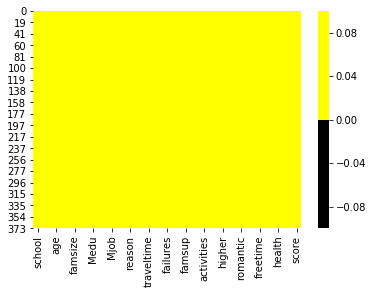

In [321]:
cols = stud_math.columns[:30] 

colours = ['black','yellow'] 
sns.heatmap(stud_math[cols].isnull(), cmap=sns.color_palette(colours))

for col in stud_math.columns:
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [322]:
stud_math.corr() #Score коррелирует хорошо с (age, Medu, failures, goout)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.144119,-0.140550,0.090811,-0.010791,0.198977,0.031053,0.035537,0.135727,-0.070991,0.195524,-0.145699
Medu,-0.144119,1.000000,0.596270,-0.170521,0.065425,-0.233046,-0.020563,0.028647,0.050826,-0.041818,0.106614,0.202612
Fedu,-0.140550,0.596270,1.000000,-0.127974,-0.006561,-0.248090,-0.023895,-0.056687,0.039622,0.023161,0.035541,0.127163
traveltime,0.090811,-0.170521,-0.127974,1.000000,-0.108797,0.062586,-0.032328,0.008483,0.054474,-0.044643,0.005065,-0.057076
studytime,-0.010791,0.065425,-0.006561,-0.108797,1.000000,-0.156087,0.017638,-0.114673,-0.058278,-0.070284,-0.083312,0.114127
failures,0.198977,-0.233046,-0.248090,0.062586,-0.156087,1.000000,-0.024581,0.061329,0.115270,0.069705,0.111767,-0.331908
famrel,0.031053,-0.020563,-0.023895,-0.032328,0.017638,-0.024581,1.000000,0.156613,0.049740,0.099399,-0.074637,0.058659
freetime,0.035537,0.028647,-0.056687,0.008483,-0.114673,0.061329,0.156613,1.000000,0.260140,0.060894,0.026790,0.038539
goout,0.135727,0.050826,0.039622,0.054474,-0.058278,0.115270,0.049740,0.260140,1.000000,-0.002308,0.102985,-0.137918
health,-0.070991,-0.041818,0.023161,-0.044643,-0.070284,0.069705,0.099399,0.060894,-0.002308,1.000000,-0.047006,-0.070045


In [323]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [324]:
for col in list(stud_math.select_dtypes(include=['object'])):
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [325]:
stud_math_for_model = stud_math.loc[:, ['address', 'higher', 'romantic', 'Medu', 'Fedu', 'age', 'failures', 'goout', 'score']]
stud_math_for_model.head()

,address,higher,romantic,Medu,Fedu,age,failures,goout,score
0,U,yes,no,4.0,4.0,18,0.0,4.0,30.0
1,U,yes,no,1.0,1.0,17,0.0,3.0,30.0
2,U,yes,no,1.0,1.0,15,3.0,2.0,50.0
3,U,yes,yes,4.0,2.0,15,0.0,2.0,75.0
4,U,yes,no,3.0,3.0,16,0.0,2.0,50.0


In [326]:
stud_math_for_model.apply(lambda x : pd.factorize(x)[0]).corr()

,address,higher,romantic,Medu,Fedu,age,failures,goout,score
address,1.000000,0.027424,0.017597,0.079981,-0.073395,-0.144167,0.145908,0.086189,0.044362
higher,0.027424,1.000000,0.118084,0.103493,-0.032095,-0.012215,0.158373,0.137864,0.141473
romantic,0.017597,0.118084,1.000000,-0.026001,0.004603,-0.044160,0.160226,0.069952,0.172400
Medu,0.079981,0.103493,-0.026001,1.000000,0.167661,0.006237,0.091393,0.054847,0.020204
Fedu,-0.073395,-0.032095,0.004603,0.167661,1.000000,0.037872,-0.004535,0.033952,-0.067489
age,-0.144167,-0.012215,-0.044160,0.006237,0.037872,1.000000,0.124006,0.025342,-0.001556
failures,0.145908,0.158373,0.160226,0.091393,-0.004535,0.124006,1.000000,-0.000990,0.260484
goout,0.086189,0.137864,0.069952,0.054847,0.033952,0.025342,-0.000990,1.000000,0.057745
score,0.044362,0.141473,0.172400,0.020204,-0.067489,-0.001556,0.260484,0.057745,1.000000


In [327]:
stud_math_for_model.corr()

,Medu,Fedu,age,failures,goout,score
Medu,1.000000,0.596270,-0.144119,-0.233046,0.050826,0.202612
Fedu,0.596270,1.000000,-0.140550,-0.248090,0.039622,0.127163
age,-0.144119,-0.140550,1.000000,0.198977,0.135727,-0.145699
failures,-0.233046,-0.248090,0.198977,1.000000,0.115270,-0.331908
goout,0.050826,0.039622,0.135727,0.115270,1.000000,-0.137918
score,0.202612,0.127163,-0.145699,-0.331908,-0.137918,1.000000
